In [1]:


# Import the dataset
from sklearn import datasets

# Import the usual packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the models
from statsmodels.api import OLS, add_constant # OLS = Ordinary Least Squares
# Ordinary Least Squares is the mathematical way of solving for the coefficients of a Linear Regression
# OLS of statsmodels is the LinearRegression of sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

# Import tools for preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Set the figure size of matplotlib plots to (12,6)
plt.rcParams['figure.figsize'] = (12,6)



In [3]:
df = pd.read_csv('data/train.csv')
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [4]:
df['datetime'] = pd.to_datetime(df['datetime']) # convert column

df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df['dayofyear'] = df['datetime'].dt.dayofyear


In [5]:
X = df.drop('count', axis=1)
y = pd.to_numeric(df['count'])


#### Train-Test-Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
type(X_train)

pandas.core.frame.DataFrame

### 1. Remove highly correlated variables
#### 1.1 correlation between input features

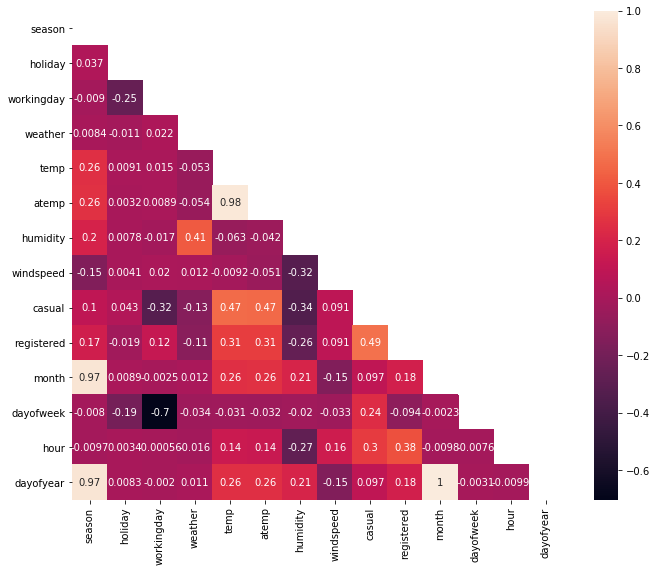

In [11]:
# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
 #           square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, annot=True, mask=mask)

In [15]:
#### 1.2 correlation between input features and target variable

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,month,dayofweek,hour,dayofyear
10639,2012-12-09 17:00:00,4,0,0,3,14.76,17.425,93,8.9981,20,209,12,6,17,344
2666,2011-06-19 00:00:00,2,0,0,1,28.70,32.575,65,0.0000,18,71,6,6,0,170
7474,2012-05-10 19:00:00,2,0,1,1,22.14,25.760,37,23.9994,84,469,5,3,19,131
5094,2011-12-06 08:00:00,4,0,1,2,18.86,22.725,94,12.9980,13,401,12,1,8,340
1714,2011-04-17 08:00:00,2,0,0,1,15.58,19.695,46,26.0027,7,36,4,6,8,107


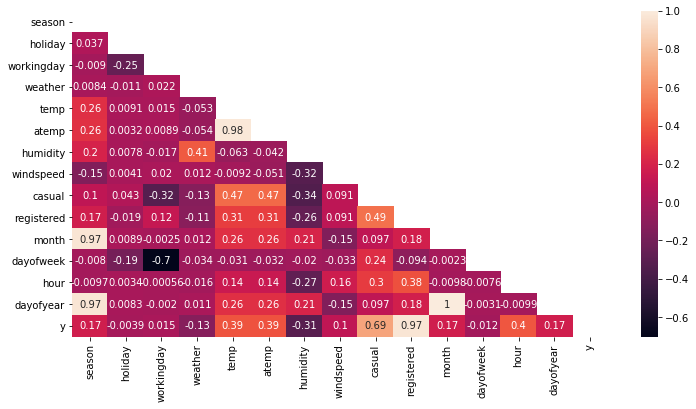

In [14]:
df_train = X_train.copy()
df_train['y'] = y_train
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
sns.heatmap(df_train.corr(), annot=True, mask=mask)

### 2) Select significant features

In [38]:
X_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,month,dayofweek,hour,dayofyear
10639,2012-12-09 17:00:00,4,0,0,3,14.76,17.425,93,8.9981,20,209,12,6,17,344
2666,2011-06-19 00:00:00,2,0,0,1,28.70,32.575,65,0.0000,18,71,6,6,0,170
7474,2012-05-10 19:00:00,2,0,1,1,22.14,25.760,37,23.9994,84,469,5,3,19,131
5094,2011-12-06 08:00:00,4,0,1,2,18.86,22.725,94,12.9980,13,401,12,1,8,340
1714,2011-04-17 08:00:00,2,0,0,1,15.58,19.695,46,26.0027,7,36,4,6,8,107


In [88]:
# create the model
# In statsmodels you have to pass in X and y already when you create the model
# You have to add_constant which just includes a intercept into the model
#y = np.asarray(y_train, dtype=float)
y = y_train
X = add_constant(X_train[['season', 'month', 'workingday', 'windspeed', 'holiday','atemp', 'humidity', 'hour', 'weather']])
#X = np.asarray(X, dtype=float)


y.shape, X.shape

((8164,), (8164, 10))

In [89]:
ols = OLS(y, X)


# Fit the model: save the fitted model in a variable
ols_results = ols.fit()



# Look at the model output
ols_results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     458.6
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:32:03   Log-Likelihood:                -52361.
No. Observations:                8164   AIC:                         1.047e+05
Df Residuals:                    8154   BIC:                         1.048e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3965     10.163      4.762      0.000      28.474      68.319
season       -10.2443      6.245     -1.640      0.101     -22.486       1.998
month         11.1572      2.026      5.506      0.000       7.185      15.129
workingday     2.9934      3.624      0.826      0.409      -4.111      10.098
windspeed      0.2906      0.213      1.361      0.173      -0.128       0.709
holiday       -1.8206     10.132     -0.180      0.857     -21.683      18.042
atemp          6.3587      0.203     31.273      0.000       5.960       6.757
humidity      -2.3174      0.105    -21.990      0.000      -2.524      -2.111
hour           7.5587      0.250     30.258      0.000       7.069       8.048
weather       -2.9226      2.907     -1.005      0.315      -8.622       2.777
==============================================================================
Omnibus:                     1969.946   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4455.529
Skew:                           1.371   Prob(JB):                         0.00
Kurtosis:                       5.362   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3) Use RF Feature Importance

In [69]:
rf = RandomForestRegressor(max_depth=5, random_state=0)

In [70]:
rf.fit(X, y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [72]:
df_fi = pd.DataFrame({'feature_importance': rf.feature_importances_, 'feature': X.columns})
df_fi.sort_values('feature_importance', ascending=False)


,feature_importance,feature
8,0.745014,hour
6,0.161565,atemp
2,0.036357,month
3,0.028210,workingday
7,0.014814,humidity
1,0.013772,season
5,0.000234,holiday
4,0.000034,windspeed
0,0.000000,const




rf.featureimportances calculates how much a input feature contributes to reducing the gini index

permutation_importance: It takes each input feature separately, shuffles the values of this feature and measures how much that changes the outcome


In [73]:
from sklearn.inspection import permutation_importance

In [76]:
pi = permutation_importance(rf, X, y)
pi = pd.DataFrame({'importance': pi['importances_mean'], 'feature': X.columns})

In [77]:
pi.sort_values('importance', ascending=False)

,importance,feature
8,0.929159,hour
6,0.177880,atemp
3,0.035313,workingday
2,0.033327,month
7,0.015656,humidity
1,0.004538,season
5,0.000169,holiday
4,0.000031,windspeed
0,0.000000,const


### 4) Recursive Feature Elimination



In the beginning it includes all features.

Then, recursively, it takes out the least important feature. "Least important" is measured in terms of featureimportance (RF) or coefficient value (Linear Regression).

In every cycle it reduces the number of features by one.
For linear regression

If you use the recursive feature elimination RFE with linear regression, be careful and scale your X data before you do. Because it takes into account the actual coefficient value (and that depends on the scale of the data).


In [79]:
from sklearn.feature_selection import RFE

In [80]:
rfe = RFE(rf, n_features_to_select=3)
rfe.fit(X, y)

RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=5,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=0, verbose=0,
                                    warm_start=False),
    n_features_to_select=3, step=1, verbose=0)

In [82]:
rfe_df = pd.DataFrame({'support': rfe.support_, 'ranking': rfe.ranking_, 'feature': X.columns})
    # rfe.support_: booleans indicating features to include 
    # rfe.ranking_: integers indicating importance

In [83]:
rfe_df.sort_values('ranking')

,support,ranking,feature
2,True,1,month
6,True,1,atemp
8,True,1,hour
3,False,2,workingday
1,False,3,season
7,False,4,humidity
5,False,5,holiday
4,False,6,windspeed
0,False,7,const


In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linreg = LinearRegression()
linreg.fit(X_scaled, y)



rfe_linreg = RFE(linreg, n_features_to_select=3)
rfe_linreg.fit(X_scaled, y)

rfe_df = pd.DataFrame({'support': rfe_linreg.support_
                       , 'ranking': rfe_linreg.ranking_
                       , 'feature': X.columns})

rfe_df.sort_values('ranking')

,support,ranking,feature
6,True,1,atemp
7,True,1,humidity
8,True,1,hour
2,False,2,month
1,False,3,season
4,False,4,windspeed
3,False,5,workingday
5,False,6,holiday
0,False,7,const


#### permutation importance with linreg

In [87]:
pi_linreg = permutation_importance(linreg, X, y)
pi_linreg = pd.DataFrame({'importance': pi_linreg['importances_mean']
                          , 'feature': X.columns})

pi_linreg.sort_values('importance', ascending=False)

,importance,feature
2,0.888148,month
1,0.035322,season
0,0.000000,const
5,-0.000004,holiday
3,-0.000729,workingday
4,-0.297285,windspeed
6,-1.198905,atemp
7,-2.256798,humidity
8,-4.830599,hour
